# UC Irvine Machine Learning Repository: ICU Patient Dataset

## Subject Area
**Health & Medicine**

## Dataset Overview
This dataset contains records from 9,105 critically ill patients across five U.S. medical centers, collected between 1989 and 1994. It covers nine specific disease categories, including acute respiratory failure and multiple organ system failure, with the aim of using demographic, physiological, and disease severity data to predict ICU discharge survival rates.

## Purpose
The dataset supports the SUPPORT (Study to Understand Prognoses and Preferences for Outcomes and Risks of Treatments) study, aimed at enhancing end-of-life decision-making by assessing outcomes for seriously ill hospitalized adults in ICU settings.

### Phase 1: Data Cleaning and Preprocessing for Predictive Analytics
The purpose of Phase 1 is to prepare the dataset for effective predictive analytics. This stage involves cleaning and preprocessing the clinical data collected from ICU patients. Key activities include identifying and correcting data inaccuracies, handling missing values, normalizing data formats, and selecting relevant features that are statistically significant predictors of patient mortality. The goal is to refine the data to a state of high quality and reliability, ensuring that it can accurately feed into predictive models. 

### Phase 2: Development and Evaluation of Predictive Models
Phase 2 is focused on the creation and testing of three machine learning models: logistic regression, decision trees, and random forests. These models are developed to predict the survival of ICU patients post-discharge, utilizing the cleaned and preprocessed data from Phase 1. The efficacy of each model is assessed using metrics such as accuracy, precision, recall, and ROC-AUC scores. The objective of this phase is to determine the most effective model that offers strong predictive capabilities, enhancing clinical decision-making related to patient outcomes. The most promising model will then be further refined through a grid search process to optimize its hyperparameters, ensuring optimal performance. 

## Broader Goals
The model is designed to enhance clinical decision-making by offering dependable statistical prognostic data, which will assist clinicians in determining treatment plans to match each patient's most probable prognoses. Accurate prognostic modeling is essential for planning appropriate end-of-life care, improving the quality of life for terminally ill patients, and making ethical resource allocation decisions in healthcare settings.

## Citations/Acknowledgements
- Vanderbilt University Department of Biostatistics
- Professor Frank Harrell, 2022
- Dataset URL: [Vanderbilt Biostatistics Data](https://hbiostat.org/data/)


## Dataset Composition

### Number of Instances (Patients)
- **Total Patients**: 9,105

### Number of Features
- **Total Features**: 42

### Types of Features
- **Demographic Information**: 
  - Age, Gender, Race.
- **Medical Data**: 
  - Detailed physiological measurements, disease categorization, and severity indicators.
- **Outcomes**: 
  - Patient survival status at 180 days post-ICU discharge.

## Data Type and Format

- **Data Composition**: The dataset includes a mix of quantitative measurements (such as physiological data and time metrics) and categorical data (such as disease categories and demographic classifications).
- **Format**: Data is maintained in a structured tabular format.

## Size and Storage Details

- **Total Data Entries**: Approximately 382,620 entries (calculated as 9,105 patients multiplied by 42 features).
- **Storage Formats**:
  - **CSV**: Comma-separated values, suitable for data manipulation and analysis in various statistical software.
  - **Database**: Structured storage for complex queries and efficient data retrieval in large-scale applications.

In [24]:
# Imported needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier


In [25]:
# Download Dataset
csv_path = 'C:/Users/tri_d/Downloads/support2.csv'
icu_mortality = pd.read_csv(csv_path)
icu_mortality.head()

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11.0,...,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.0
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11.0,...,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,...,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0


In [26]:
# Statistical summaries of numeric columns
icu_mortality.describe()

,age,death,hospdead,slos,d.time,num.co,edu,scoma,charges,totcst,...,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
count,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,7471.000000,9104.000000,8.933000e+03,8217.000000,...,6504.000000,9038.000000,9104.000000,6821.000000,4605.000000,4753.000000,4243.000000,3464.000000,6238.000000,9105.000000
mean,62.650823,0.681054,0.259198,17.863042,478.449863,1.868644,11.747691,12.058546,5.999579e+04,30825.867768,...,2.554463,1.770961,137.568541,7.415364,159.873398,32.349463,2191.546047,1.157910,1.637384,1.888272
std,15.593710,0.466094,0.438219,22.006440,560.383272,1.344409,3.447743,24.636694,1.026488e+05,45780.820986,...,5.318448,1.686041,6.029326,0.080563,88.391541,26.792288,1455.245777,1.739672,2.231358,2.003763
min,18.041990,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.169000e+03,0.000000,...,0.099991,0.099991,110.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,52.797000,0.000000,0.000000,6.000000,26.000000,1.000000,10.000000,0.000000,9.740000e+03,5929.566400,...,0.500000,0.899902,134.000000,7.379883,103.000000,14.000000,1165.500000,0.000000,0.000000,0.000000
50%,64.856990,1.000000,0.000000,11.000000,233.000000,2.000000,12.000000,0.000000,2.502400e+04,14452.734400,...,0.899902,1.199951,137.000000,7.419922,135.000000,23.000000,1968.000000,0.000000,1.000000,1.000000
75%,73.998960,1.000000,1.000000,20.000000,761.000000,3.000000,14.000000,9.000000,6.459800e+04,36087.937500,...,1.899902,1.899902,141.000000,7.469727,188.000000,42.000000,3000.000000,2.000000,3.000000,3.000000
max,101.847960,1.000000,1.000000,343.000000,2029.000000,9.000000,31.000000,100.000000,1.435423e+06,633212.000000,...,63.000000,21.500000,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242


In [27]:
# Show information about the dataset
icu_mortality.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9105 entries, 1 to 9105
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   death     9105 non-null   int64  
 2   sex       9105 non-null   object 
 3   hospdead  9105 non-null   int64  
 4   slos      9105 non-null   int64  
 5   d.time    9105 non-null   int64  
 6   dzgroup   9105 non-null   object 
 7   dzclass   9105 non-null   object 
 8   num.co    9105 non-null   int64  
 9   edu       7471 non-null   float64
 10  income    6123 non-null   object 
 11  scoma     9104 non-null   float64
 12  charges   8933 non-null   float64
 13  totcst    8217 non-null   float64
 14  totmcst   5630 non-null   float64
 15  avtisst   9023 non-null   float64
 16  race      9063 non-null   object 
 17  sps       9104 non-null   float64
 18  aps       9104 non-null   float64
 19  surv2m    9104 non-null   float64
 20  surv6m    9104 non-null   float64
 

## Process of Data Cleaning

### 1. Handling Missing Values
- **Imputation of Numerical Data**: Using statistical values like the median to fill in missing entries in numerical columns, which helps to reduce the impact of outliers.
- **Imputation of Categorical Data**: Filling missing entries with the most frequent value (mode) in categorical columns.

### 2. Filtering Irrelevant Features
- **Domain Expertise**: Leveraging knowledge as a ICU Respiratory Therapist about the domain to identify and remove variables that are not relevant to the research questions.

### 3. Removing Outliers
Outliers can skew results and impair model accuracy, especially in algorithms sensitive to data distribution:
- **Interquartile Range (IQR) Method**: Identifying outliers by defining a range outside of 1.5 times the IQR from the quartiles and removing these data points to achieve a more normalized data distribution.

### 4. Encoding Categorical Variables
- **Label Encoding**: Converting binary or ordinal categorical variables into a numerical format by assigning each unique category a unique integer.
- **One-Hot Encoding**: Creating binary columns for each category of nominal variables, which helps to reduce multicollinearity

In [28]:
# Check for missing values in the dataset
# Counts of missing values in each column
icu_mortality.isnull().sum()

age            0
death          0
sex            0
hospdead       0
slos           0
d.time         0
dzgroup        0
dzclass        0
num.co         0
edu         1634
income      2982
scoma          1
charges      172
totcst       888
totmcst     3475
avtisst       82
race          42
sps            1
aps            1
surv2m         1
surv6m         1
hday           0
diabetes       0
dementia       0
ca             0
prg2m       1649
prg6m       1633
dnr           30
dnrday        30
meanbp         1
wblc         212
hrt            1
resp           1
temp           1
pafi        2325
alb         3372
bili        2601
crea          67
sod            1
ph          2284
glucose     4500
bun         4352
urine       4862
adlp        5641
adls        2867
sfdm2       1400
adlsc          0
dtype: int64

In [29]:
# Drop columns with missing values exceeding the threshold of 25%.
# Columns with high levels of missing data can dilute the statistical power of tests and models
threshold = len(icu_mortality) * 0.25
columns_to_drop = [column for column in icu_mortality.columns if icu_mortality[column].isnull().sum() > threshold]
icu_mortality.drop(columns=columns_to_drop, inplace=True)

icu_mortality.isnull().sum()

age            0
death          0
sex            0
hospdead       0
slos           0
d.time         0
dzgroup        0
dzclass        0
num.co         0
edu         1634
scoma          1
charges      172
totcst       888
avtisst       82
race          42
sps            1
aps            1
surv2m         1
surv6m         1
hday           0
diabetes       0
dementia       0
ca             0
prg2m       1649
prg6m       1633
dnr           30
dnrday        30
meanbp         1
wblc         212
hrt            1
resp           1
temp           1
crea          67
sod            1
sfdm2       1400
adlsc          0
dtype: int64

In [30]:
# As a domain expert(ICU Respiratory Therapist)
# Remove all varibles I believe are not relevant to the study
# slos - Days from Study Entry to Discharge, 
# d.time - Days of follow-up 
# charges - Hospital charges
# totcst - Total ratio of costs to charges (RCC) cost
# surv2m - SUPPORT model 2-month survival estimate at day 3 (predicted by a model) 
# surv6m - SUPPORT model 6-month survival estimate at day 3 (predicted by a model)
# hday - Day in hospital at which patient entered study
# prg2m - Physician’s 2-month survival estimate for patient
# prg6m - Physician’s 6-month survival estimate for patient
# dnrday - Day of DNR order (<0 if before study)
# adlsc - Imputed ADL Calibrated to Surrogate
# sfdm2 - Level of functional disability of the patient in a 1-5 scale
# edu - Years of education
# avtisst - Average TISS score

columns_to_drop = ['slos', 'd.time', 'charges', 'totcst', 'surv2m', 'surv6m', 'hday', 'prg2m', 'prg6m', 'dnrday', 'adlsc', 'sfdm2', 'edu', 'avtisst']
icu_mortality.drop(columns=columns_to_drop, inplace=True)
icu_mortality.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9105 entries, 1 to 9105
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   death     9105 non-null   int64  
 2   sex       9105 non-null   object 
 3   hospdead  9105 non-null   int64  
 4   dzgroup   9105 non-null   object 
 5   dzclass   9105 non-null   object 
 6   num.co    9105 non-null   int64  
 7   scoma     9104 non-null   float64
 8   race      9063 non-null   object 
 9   sps       9104 non-null   float64
 10  aps       9104 non-null   float64
 11  diabetes  9105 non-null   int64  
 12  dementia  9105 non-null   int64  
 13  ca        9105 non-null   object 
 14  dnr       9075 non-null   object 
 15  meanbp    9104 non-null   float64
 16  wblc      8893 non-null   float64
 17  hrt       9104 non-null   float64
 18  resp      9104 non-null   float64
 19  temp      9104 non-null   float64
 20  crea      9038 non-null   float64
 

In [31]:
# Remove all rows where the hospital death occured in the hospital.  Did not want to include patients who had died while in hospital to 
# affect patient discharge survival rate
icu_mortality = icu_mortality[icu_mortality['hospdead'] != 1]
print(icu_mortality['hospdead'].unique())

[0]


In [32]:
# Used median_imputer to fill in missing values in numeric data. The median is less sensitive to outliers, making it a good choice for 
# imputing skewed numeric data.
# Used mode_imputer uses the mode to fill in missing values in categorical data. 

from sklearn.impute import SimpleImputer, KNNImputer

median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

# Modifying the DataFrame using loc
for column in ['meanbp', 'wblc', 'hrt', 'resp', 'temp', 'crea', 'sod']:
    icu_mortality.loc[:, column] = median_imputer.fit_transform(icu_mortality[[column]])

for column in ['race', 'dnr']:
    icu_mortality.loc[:, column] = mode_imputer.fit_transform(icu_mortality[[column]])

print(icu_mortality.isnull().sum())

age         0
death       0
sex         0
hospdead    0
dzgroup     0
dzclass     0
num.co      0
scoma       0
race        0
sps         0
aps         0
diabetes    0
dementia    0
ca          0
dnr         0
meanbp      0
wblc        0
hrt         0
resp        0
temp        0
crea        0
sod         0
dtype: int64


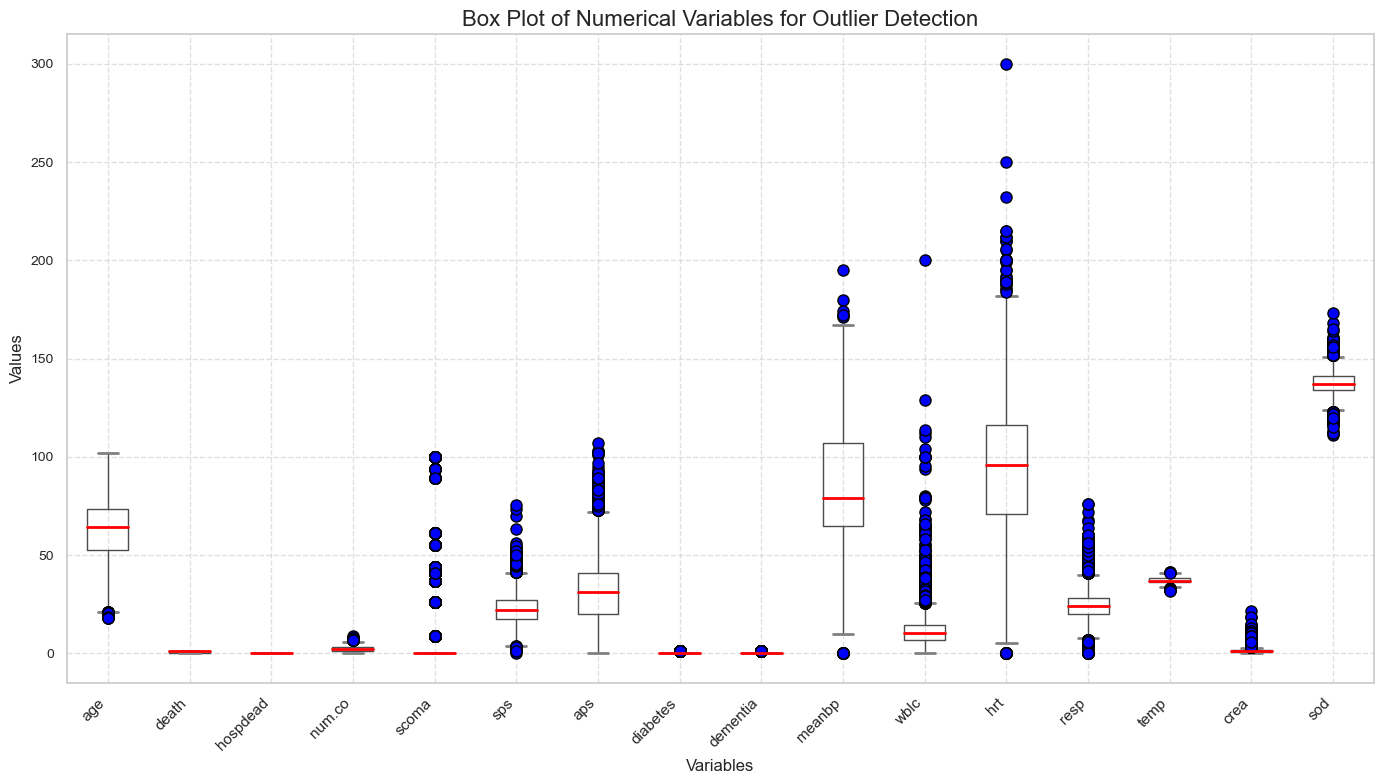

In [33]:
# Check for outliers using a box-plot
numerical_data = icu_mortality.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 8))

medianprops = dict(linestyle='-', linewidth=2, color='red')
flierprops = dict(marker='o', markerfacecolor='blue', markersize=8)
capprops = dict(linestyle='-', linewidth=2, color='grey')

numerical_data.boxplot(medianprops=medianprops, flierprops=flierprops,capprops=capprops)

plt.xticks(rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.title('Box Plot of Numerical Variables for Outlier Detection', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6) 
plt.tight_layout()

plt.show()

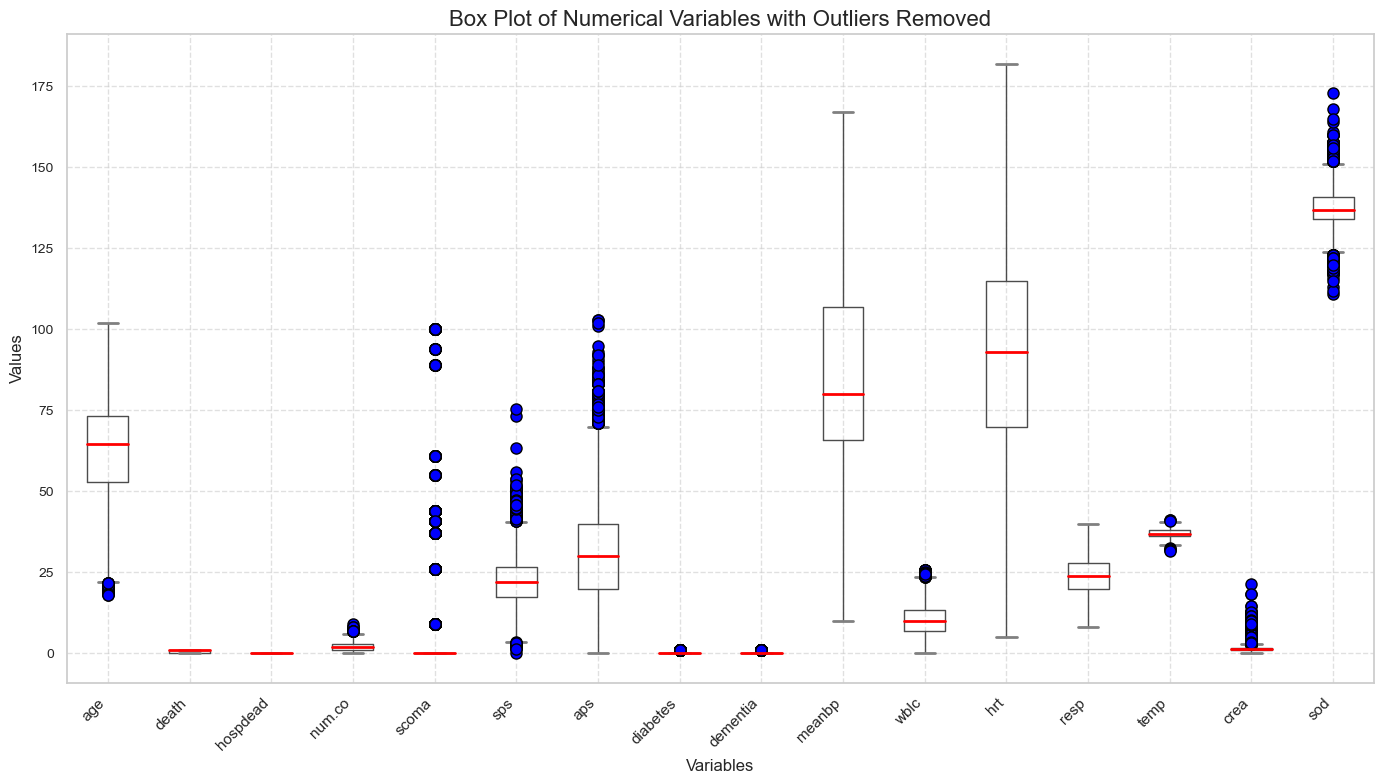

In [34]:
# Remove Outliers
# Use the IQR measures the middle spread of the data to determine where the outliers lie.
# Outliers are determined based on Domain Knowledge and removed.
columns_to_filter = ['wblc', 'hrt', 'resp', 'meanbp']

outlier = pd.Series(False, index=icu_mortality.index)

for column in columns_to_filter:
    Q1 = icu_mortality[column].quantile(0.25)
    Q3 = icu_mortality[column].quantile(0.75)
    IQR = Q3 - Q1
    filter = ~((icu_mortality[column] < (Q1 - 1.5 * IQR)) | (icu_mortality[column] > (Q3 + 1.5 * IQR)))
    outlier = outlier | ~filter 
# Remove outliers from the dataframe
icu_mortality = icu_mortality[~outlier]
numerical_data = icu_mortality.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 8))

# Display new box plox with Outliers removed
medianprops = dict(linestyle='-', linewidth=2, color='red')
flierprops = dict(marker='o', markerfacecolor='blue', markersize=8)
capprops = dict(linestyle='-', linewidth=2, color='grey')
numerical_data.boxplot(medianprops=medianprops, flierprops=flierprops,capprops=capprops)

plt.xticks(rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.title('Box Plot of Numerical Variables with Outliers Removed', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6) 
plt.tight_layout()

plt.show()

In [35]:
# Label Encoding
# Used for converting categorical text data into a model-understandable numerical format. 
# Label encoding is crucial because most machine learning models work with numeric data and cannot handle categorical variables directly.

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
icu_mortality['sex'] = label_encoder.fit_transform(icu_mortality['sex'])
icu_mortality['dzgroup'] = label_encoder.fit_transform(icu_mortality['dzgroup'])
icu_mortality['dzclass'] = label_encoder.fit_transform(icu_mortality['dzclass'])
icu_mortality['race'] = label_encoder.fit_transform(icu_mortality['race'])
icu_mortality['dnr'] = label_encoder.fit_transform(icu_mortality['dnr'])


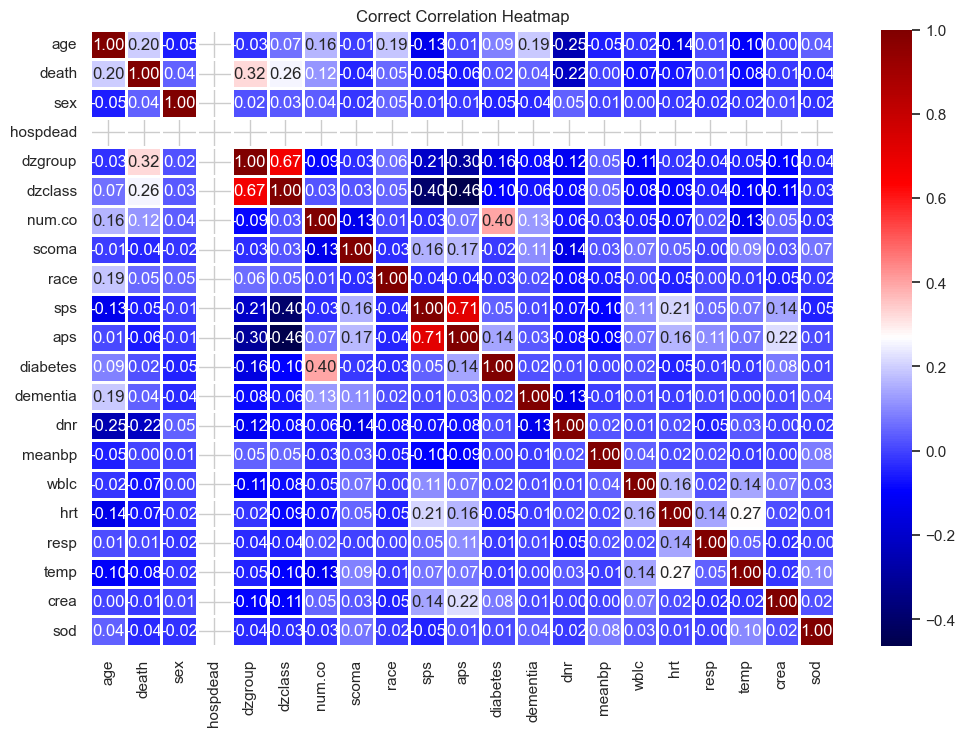

In [36]:
# Create a Correlation HeatMap for Data
numeric_data = icu_mortality.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', fmt=".2f", linewidths=1)
plt.title('Correct Correlation Heatmap')
plt.show()

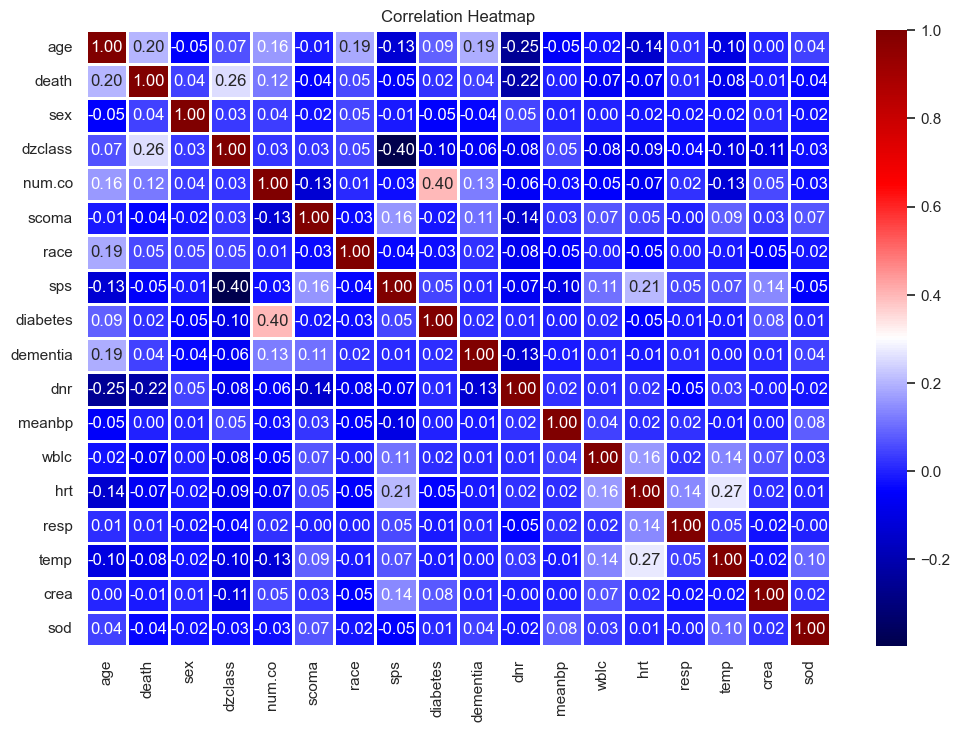

In [37]:
# Correlation between sps and aps
icu_mortality.drop('aps', axis=1, inplace=True)
# Correlation between dzgroup and dzclass
icu_mortality.drop('dzgroup', axis=1, inplace=True)

# Remove hospdead variable as it is empty
# Column contains a constant value (where all entries are the same = 1)
columns_to_drop2 = ['hospdead']
icu_mortality.drop(columns=columns_to_drop2, inplace=True)

# Rechart correlation matrix with correlated variables removed
numeric_data = icu_mortality.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))  # Set the figure size (optional)
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', fmt=".2f", linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

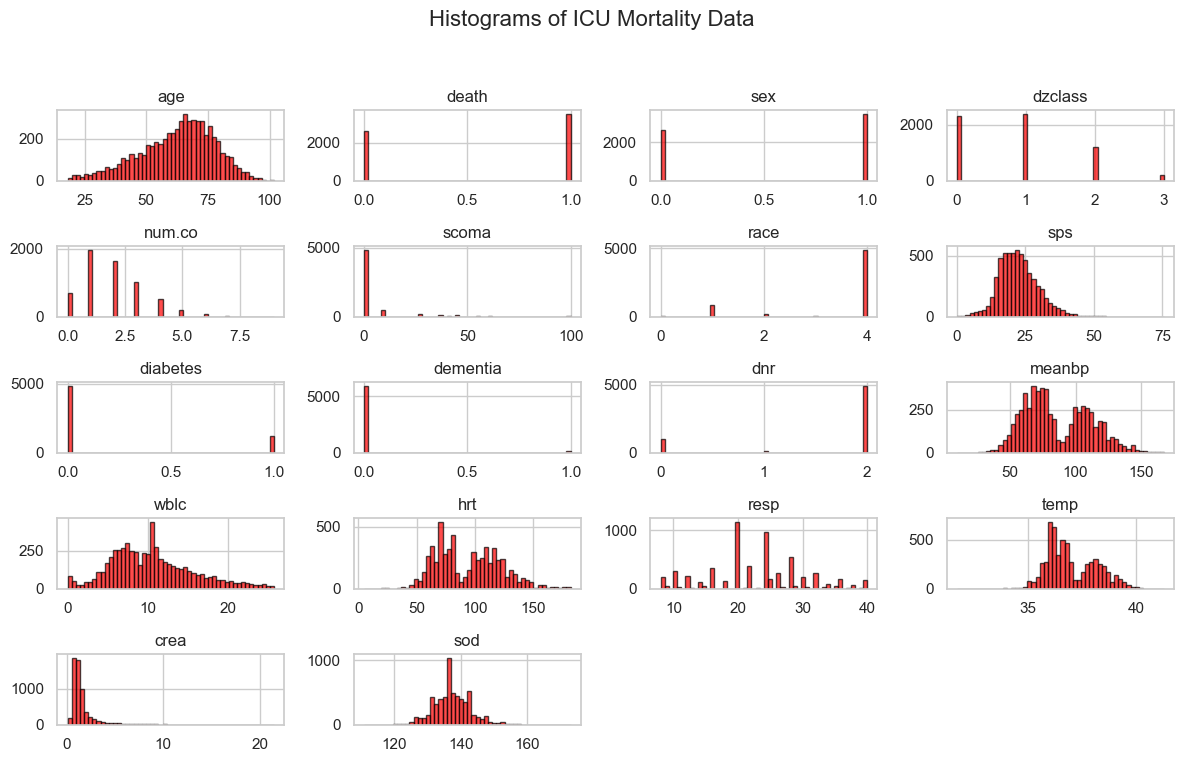

In [38]:
# Explored Resulting data in Histograms
sns.set(style="whitegrid")
icu_mortality.hist(bins=50, figsize=(12, 8),alpha=0.7, color='red', edgecolor='black', grid=True)
plt.suptitle('Histograms of ICU Mortality Data', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Final Dataset Overview

### Dataset Composition
The final dataset consists of 17 variables, which include a mix of demographic information, clinical measurements, and outcome indicators. The following variables will be used for analyzing and predicting ICU survival outcomes.

**Variables List:**
- **Age**: Patient's age
- **Sex**: Patient's gender
- **Dzclass**: Disease classification
- **Num.co**: Number of comorbidities
- **Scoma**: Glasgow Coma Score
- **Race**: Patient's race
- **Sps**: Systemic inflammatory response syndrome (SIRS) score
- **Diabetes**: Indicator of diabetes
- **Dementia**: Indicator of dementia
- **Dnr**: Do not resuscitate order status
- **MeanBp**: Mean blood pressure
- **Wblc**: White blood cell count
- **Hrt**: Heart rate
- **Resp**: Respiratory rate
- **Temp**: Temperature
- **Crea**: Creatinine levels
- **Sod**: Sodium levels

### Feature Selection

For the purposes of the model, the following features are selected based on their clinical relevance and data availability:

**Features (X):**
- Age, Sex, Dzclass, Num.co, Scoma, Race, Sps, Diabetes, Dementia, Dnr, MeanBp, Wblc, Hrt, Resp, Temp, Crea, Sod

**Target Variable (Y):**
- Binary outcome representing death/survival in the ICU.

### Train-Test Split

The dataset is split into training and testing sets to ensure an unbiased evaluation of the model. The distribution is as follows:
- **Test Size**: 20% of the total data
- **Training Size**: Remaining 80% of the data

This split helps in validating the model's performance on unseen data, simulating real-world applications.

### Feature Scaling

To standardize the features and ensure that the model is not biased by the inherent scale of the data, feature scaling is performed. 


In [39]:
numeric_cols = ['age', 'scoma', 'sps', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'crea', 'sod']

# Splitting Data into Training/Testing Data sets
X = icu_mortality[numeric_cols]
y = icu_mortality['death']  # Assuming 'death' is a binary variable (0 for alive, 1 for deceased)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Models Used on Data

For the analysis of ICU survival outcomes, the following machine learning models were employed. Each model was chosen based on its ability to handle binary classification tasks effectively.

1. **Binary Regression**
   - This model is used to predict the probability of a binary outcome based on my data sets predictor variables. It will be useful for understanding the impact of various features on the likelihood of survival in the ICU.

2. **Random Forest Classifier**
   - Random Forest for binary classification improves accuracy and reduces overfitting by averaging the predictions of multiple decision trees and provides valuable insights into feature importance, making it ideal for complex classification tasks like medical diagnoses.

3. **KNN (K-Nearest Neighbors) Classifier**
   - A non-parametric method used for classification by comparing the distances between feature vectors and is useful for cases where the decision boundary is highly irregular.


## Logistic Regression

1. **Train Model**
   - Fit the logistic regression model to your training data.

2. **Create a Logistic Regression Graph for One Variable**
   - Visualize the impact of a single predictor on the probability of the outcome. 

3. **Test Model Accuracy**
   - Evaluate the model's performance by making predictions on the test set and comparing them against the actual outcomes.

4. **ROC Curve, AUC, Precision-Recall**
   - Generate and analyze the Receiver Operating Characteristic (ROC) curve and compute the Area Under the Curve (AUC) to evaluate the model’s discrimination ability between the positive and negative classes.

5. **Evaluate Feature Coefficients**
   - Analyze the coefficients of the features in the logistic regression model. 

In [40]:
model_reg = LogisticRegression()

# Train the model
model_reg.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_prob = model_reg.predict_proba(X_test)[:, 1]

# Sample Binary Graph of a single variable for the relationship between age and probability of death after ICU discharge
age_test = X_test[:, numeric_cols.index('age')]

plt.figure(figsize=(10, 6))
plt.plot(age_range, probabilities, color='red', label='Logistic Regression')  # Logistic regression curve
plt.scatter(age_test, y_prob, color='blue', alpha=0.2, label='Prob(death)')  # Original scatter plot
plt.title('Predicted Probability of Death by Age')
plt.xlabel('Standardized Age')
plt.ylabel('Probability of Death')
plt.legend()
plt.grid(True)
plt.show()




NameError: name 'age_range' is not defined

<Figure size 1000x600 with 0 Axes>

In [42]:
# Predict on the test set
y_pred = model_reg.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print formatted results
print(f"{'Metric':<10}{'Value':>10}")
print(f"{'-'*21}")
print(f"{'Accuracy':<10}{accuracy:10.4f}")
print(f"{'Precision':<10}{precision:10.4f}")
print(f"{'Recall':<10}{recall:10.4f}")
print(f"{'F1 Score':<10}{f1:10.4f}")

Metric         Value
---------------------
Accuracy      0.6363
Precision     0.6484
Recall        0.8291
F1 Score      0.7277


NameError: name 'confusion_matrix' is not defined

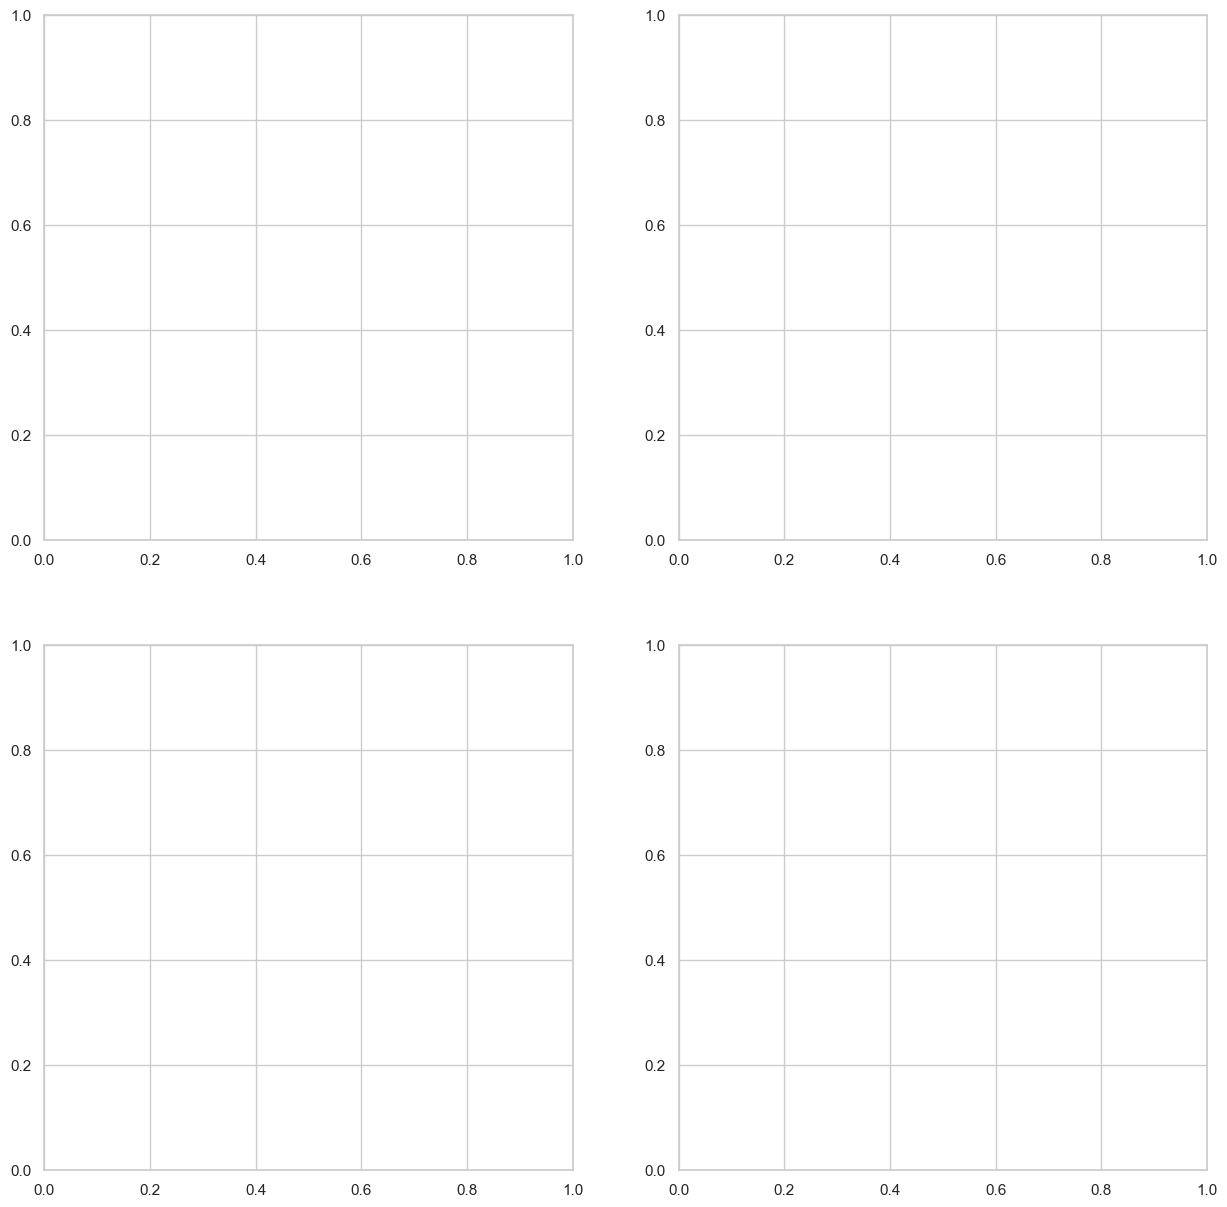

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# Plot 1: Confusion Matrix
y_pred = model_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_reg.classes_)
disp.plot(ax=axes[0, 0], colorbar=False, cmap='Reds')
axes[0, 0].set_title('Confusion Matrix') 

# Plot 2: ROC Curve
y_prob = model_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC (area = {roc_auc:.2f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive')
axes[0, 1].set_ylabel('True Positive')
axes[0, 1].set_title('ROC')
axes[0, 1].legend(loc="lower right")

# Plot 3: Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)
axes[1, 0].plot(recall, precision, marker='.', color='red', label=f'AP={ap:.2f}')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision-Recall Curve')
axes[1, 0].legend()

# Plot 4: Feature Coefficients
coefficients = model_reg.coef_[0]
features = np.array(numeric_cols)
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
sns.barplot(x='Coefficient', y='Feature', data=coef_df, ax=axes[1, 1])
axes[1, 1].set_title('Feature Coefficients')

plt.tight_layout()
plt.show()

The RandomForest Classifier is an ensemble machine learning model that uses multiple decision trees to make accurate and predictions.

### 1. Train Model
   - The model is trained using a set of training data. This step involves configuring parameters such as the number of decision trees in the forest and the criteria for splitting nodes.

### 2. Create a RandomForest Plot Tree
   - One of the trees from the forest is visualized. This helps in understanding how the model uses the features to make predictions.

### 3. Test Model Accuracy
   - The accuracy of the model is assessed using a separate test dataset to evaluate how well the model performs on new, unseen data.

### 4. ROC Curve, AUC, Precision-Recall
   - The model's ability to distinguish between classes is evaluated using the ROC curve and the Area Under Curve (AUC) metrics. Additionally, the precision-recall curve is analyzed to assess the trade-offs between precision and recall..

### 5. Evaluate Feature Coefficients
   - Create Importance Bar Graph


In [ ]:
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

In [ ]:
from sklearn.tree import plot_tree
chosen_tree = forest_model.estimators_[0]
plt.figure(figsize=(20,10))
plot_tree(chosen_tree, 
          class_names=["Alive", "Dead"],
          feature_names=numeric_cols,
          max_depth=2)
plt.title('Decision Tree from Random Forest')
plt.show()

In [ ]:
y_pred = forest_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"{'Metric':<10}{'Value':>10}")
print(f"{'-'*21}")
print(f"{'Accuracy':<10}{accuracy:10.4f}")
print(f"{'Precision':<10}{precision:10.4f}")
print(f"{'Recall':<10}{recall:10.4f}")
print(f"{'F1 Score':<10}{f1:10.4f}")


In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# Plot 1: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(ax=axes[0, 0], colorbar=False, cmap='Blues')
axes[0, 0].set_title('Confusion Matrix')

# Plot 2: ROC Curve
y_prob = forest_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC (area = {roc_auc:.2f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive')
axes[0, 1].set_ylabel('True Positive')
axes[0, 1].set_title('ROC')
axes[0, 1].legend(loc="lower right")

# Plot 3: Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)
axes[1, 0].plot(recall, precision, marker='.', color='red', label=f'AP={ap:.2f}')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision-Recall curve')
axes[1, 0].legend()

# Important Random Forest CLassifiers
feature_importances = pd.DataFrame(forest_model.feature_importances_, index=numeric_cols, columns=['importance']).sort_values('importance', ascending=False)
feature_importances['importance'].plot(kind='bar', color='skyblue', ax=axes[1, 1])
axes[1, 1].set_title('Feature Importances')
axes[1, 1].set_ylabel('Importance')
axes[1, 1].set_xlabel('Features')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## KNeighbors Classifier Workflow Summary

The KNeighbors Classifier is a non-parametric method used for classification.

### 1. Train Model
   - The classifier is trained on the processed dataset where the model is predicteding life or death of ICU discharge.

### 2. Create a Sample KNN Graph
   - Visualize how the KNN algorithm classifies new data points, a graph is created showing decision boundaries.
   
### 3. Test Model Accuracy
   - The accuracy of the KNeighbors Classifier is assessed on a separate test set. 

### 4. ROC Curve, AUC, Precision-Recall
   - The classifier's ability to discriminate between classes is evaluated using the (ROC) curve and Area Under the Curve (AUC). Additionally, the precision-recall curve is plotted to understand the balance between precision and recall.


In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

In [ ]:
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"{'Metric':<10}{'Value':>10}")
print(f"{'-'*21}")
print(f"{'Accuracy':<10}{accuracy:10.4f}")
print(f"{'Precision':<10}{precision:10.4f}")
print(f"{'Recall':<10}{recall:10.4f}")
print(f"{'F1 Score':<10}{f1:10.4f}")

NameError: name 'knn_model' is not defined

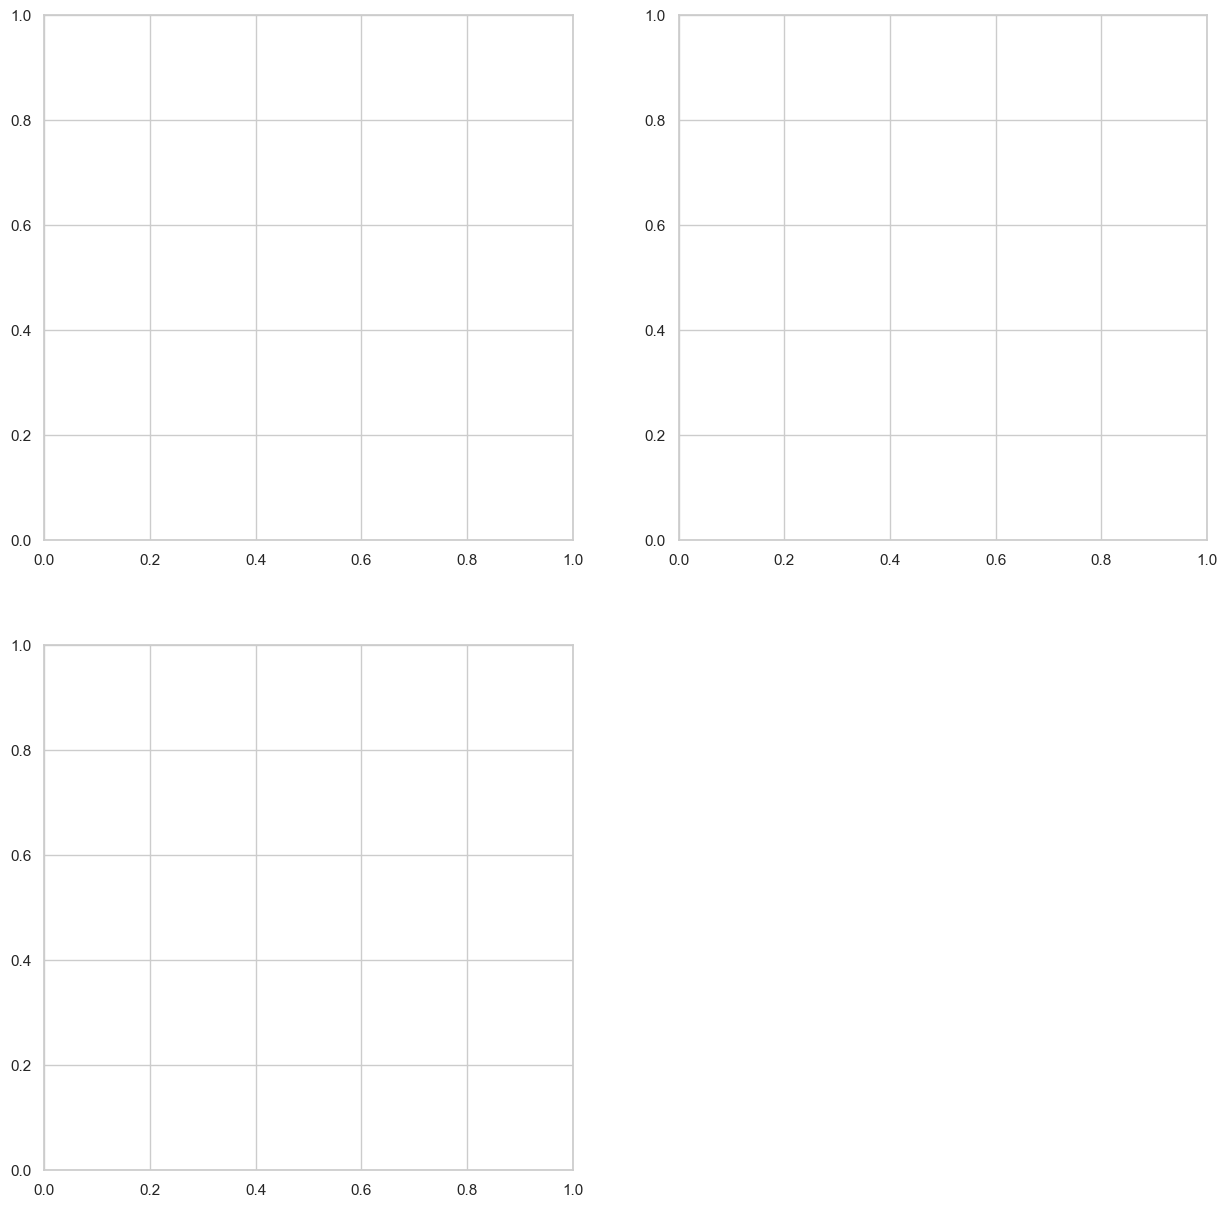

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
fig.delaxes(axes[1][1])

# Plot 1: Confusion Matrix
y_pred = knn_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(ax=axes[0, 0], colorbar=False, cmap='Greens')
axes[0, 0].set_title('Confusion Matrix')

# Plot 2: ROC Curve
y_prob = knn_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC (area = {roc_auc:.2f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC')
axes[0, 1].legend(loc="lower right")

# Plot 3: Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)
axes[1, 0].plot(recall, precision, marker='.', color='red', label=f'AP={ap:.2f}')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision-Recall Curve')
axes[1, 0].legend()

plt.tight_layout()
plt.show()


## Model Comparison and Future Plans

- **Comparison of Models**: The Logistic Regression Model and the Random Forest Classifier have shown similar levels of accuracy and precision in their predictions.  The KNN Model poorly fit the training Dataset.
- **Future Plan**: The plan is to fine-tune the parameters of the Random Forest Classifier in order to improve both accuracy, precision and AUC.  

In [21]:
forest_model_remodel = RandomForestClassifier()

# Parameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Tree Number
    'max_depth': [None, 10, 20, 30],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Sample Selection Method
}

grid_search = GridSearchCV(estimator=forest_model_remodel, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)


NameError: name 'GridSearchCV' is not defined

In [22]:
# Predict with the best model
best_forest = grid_search.best_estimator_
y_pred = best_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"{'Metric':<10}{'Value':>10}")
print(f"{'-'*21}")
print(f"{'Accuracy':<10}{accuracy:10.4f}")
print(f"{'Precision':<10}{precision:10.4f}")
print(f"{'Recall':<10}{recall:10.4f}")
print(f"{'F1 Score':<10}{f1:10.4f}")

NameError: name 'grid_search' is not defined

NameError: name 'best_forest' is not defined

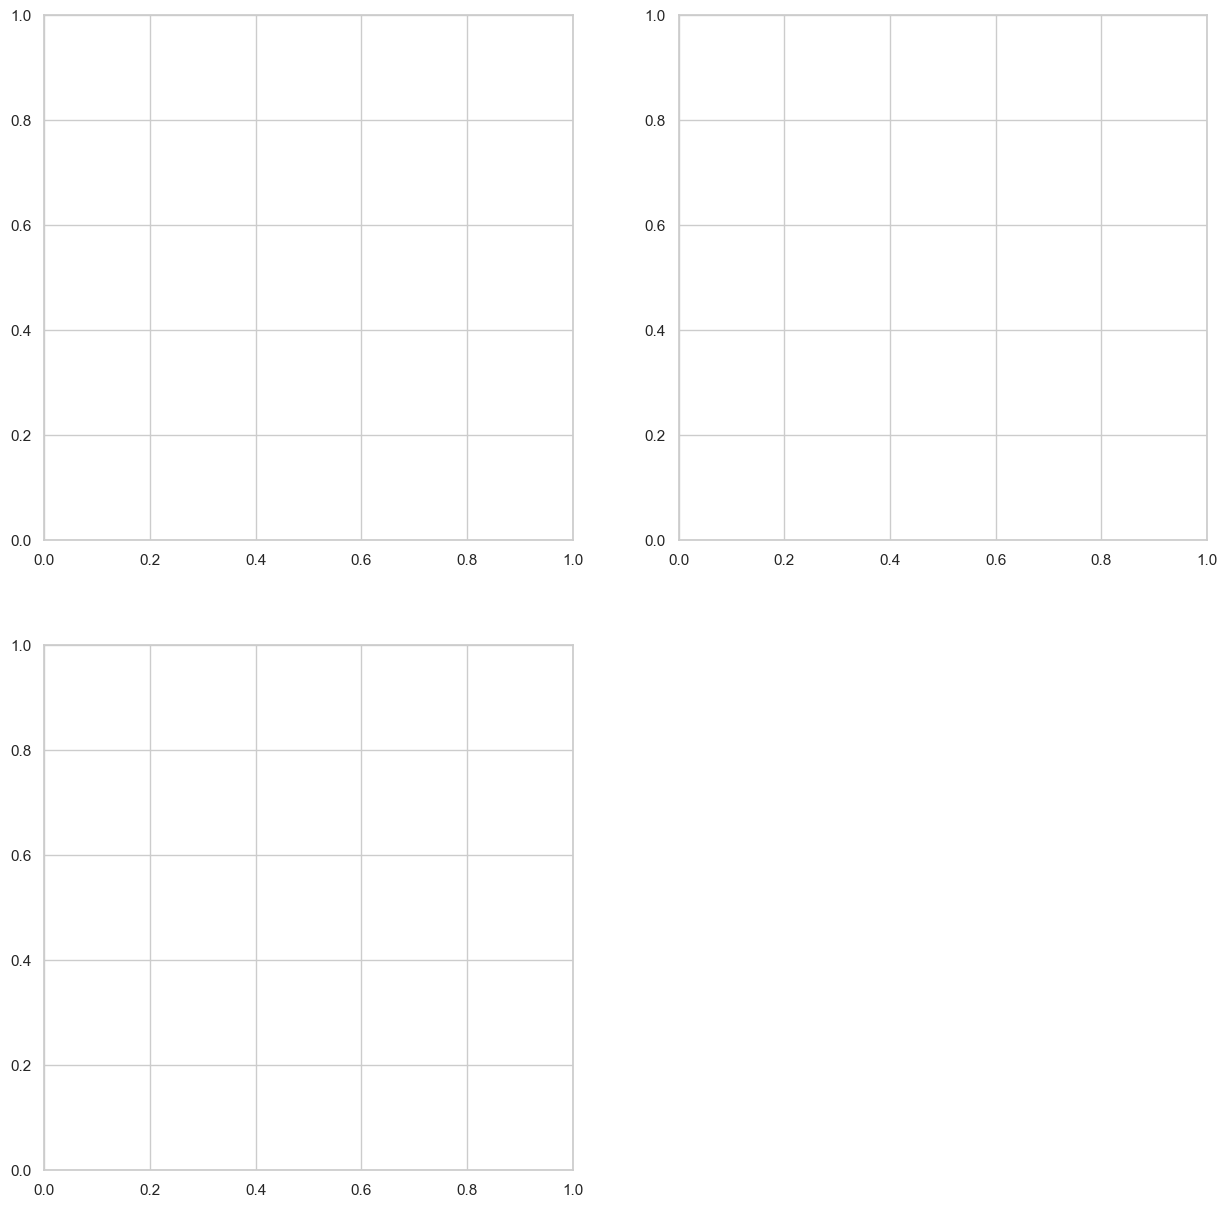

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
fig.delaxes(axes[1][1])


# Plot 1: Confusion Matrix
y_pred = best_forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(ax=axes[0, 0],  colorbar=False, cmap='Purples')
axes[0, 0].set_title('Confusion Matrix')

# Plot 2: ROC Curve
y_prob = best_forest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC(area = {roc_auc:.2f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC')
axes[0, 1].legend(loc="lower right")

# Plot 3: Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)
axes[1, 0].plot(recall, precision, marker='.', color='red', label=f'AP={ap:.2f}')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision-Recall curve')
axes[1, 0].legend()

plt.tight_layout()
plt.show()

# Conclusion Report on ICU Patient Dataset Analysis

## Summary

The purpose of the Report was to analyze and model the ICU Patient Dataset sourced from the UC Irvine Machine Learning Repository. The dataset included records from 9,105 post-intensive care critically ill patients. The primary objective of the report was to develop a prognostic model to predict ICU discharge survival rates.

## Data Exploration and Preparation

The initial dataset consisted of 42 features with a variety of demographic and medical data points. Preprocessing steps included handling missing values, filtering irrelevant features, removing outliers, and encoding categorical variables. After preprocessing, the dataset was reduced to 17 critical variables that effectively represented the necessary clinical measurements needed for my analysis.

## Model Development and Validation

I employed three machine learning models: Logistic Regression, Random Forest Classifier, and K-Nearest Neighbors (KNN) Classifier, focusing on binary classification tasks to predict patient ICU survival.

## Model Performance

The models were evaluated based on accuracy, precision, recall, F1 Score, ROC Curve, and AUC. The Logistic Regression and Random Forest models showed relatively comparable performance. KNN lagged in performance metrics.

- **Logistic Regression**: Showed a balanced trade-off with an F1 score of 0.7277.
- **Random Forest Classifier**: Achieved an F1 score of 0.7165, slightly lower than Logistic Regression but with better precision.
- **K-Nearest Neighbors**: Underperformed with an F1 score of 0.6539, indicating a poorer fit for the dataset's complexity.

## Model Optimization

I decided to fine-tune the hyperparameters of the Random Forest becuase it showed promising model performance. After fine-tuning the Random Forest Classifier model using grid-search, I was able to improve the F1 score to 0.7499. This proved to be the best model.

## Wys to Improve the study on ICU Patient Dataset

- **Higher Quality Data**: Ensuring that the data is of higher quality, with fewer missing values and errors. This could improve my model accuracy and allow for more variables to be included in the study.
- **Advanced Modeling Techniques**: Experiment with other models given the complexity of the medical data. Models that may provide better results include Support Vector Machines, Gradient Boosting Machines, or Deep Learning Models.

## Further Questions about the Data Set that could be explored

- How do patient outcomes vary across different disease categories?
- Which interventions are most effective for specific diseases in the ICU?
- Is there a way to predict which patients will require more resource-intensive care?
- Can we predict which patients are at risk of rapid deterioration?

## Conclusion

The analysis conducted on the ICU Patient Dataset has provided significant insights into the factors influencing patient survival in critical care settings. By employing and comparing different machine learning models, I have established a model for predicting patient outcomes with the following metrics; Accuracy = 0.6511, Precision = 0.6523, Recall = 0.8669, F1 Score = 0.7444. This model can significantly aid in clinical decision-making and resource allocation in healthcare settings.